In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_boxplot, single_histplot, single_violinplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping_numerical_fields, confidence_interval
from statistics import mean, pstdev

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# remove those who didn't answered
df = df[df['D8_ML_Production'] != '-99']

In [4]:
# convert column to integer - if you read before this line, you will get an string like '14'
df = df.astype({"D8_ML_Production": int}, errors='raise') 

In [5]:
valid_answers_list = list(df['D8_ML_Production'])

In [6]:
bootstrapped_list_data = bootstrapping_numerical_fields(answers=valid_answers_list, population_size=1000)

In [7]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_list_data)
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 4.092| Lower: 3.8680587102832527| Uper: 4.315941289716746


In [8]:
# d8 dataframe with only one column - plots purpose
d8_df = pd.DataFrame()
d8_df['ML Projects in Production'] = bootstrapped_list_data

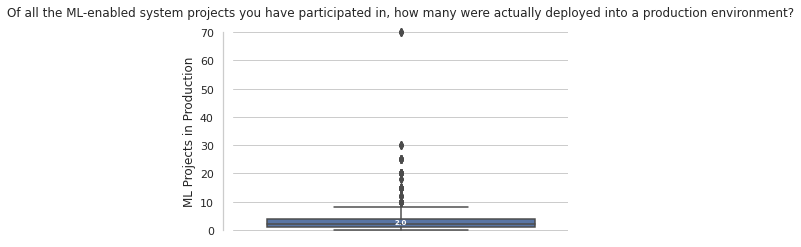

In [9]:
single_boxplot(d8_df, "ML Projects in Production",
               title="Of all the ML-enabled system projects you have participated in, how many were actually deployed into a production environment?")

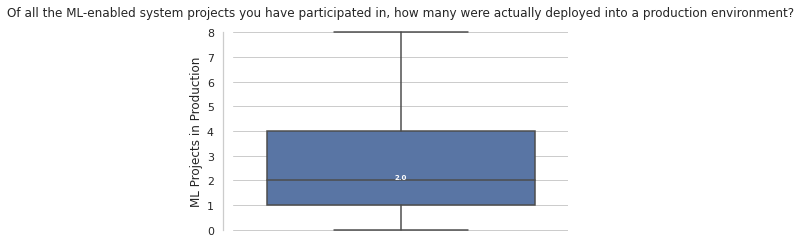

In [10]:
single_boxplot(d8_df, "ML Projects in Production", outliers=False,
               title="Of all the ML-enabled system projects you have participated in, how many were actually deployed into a production environment?")

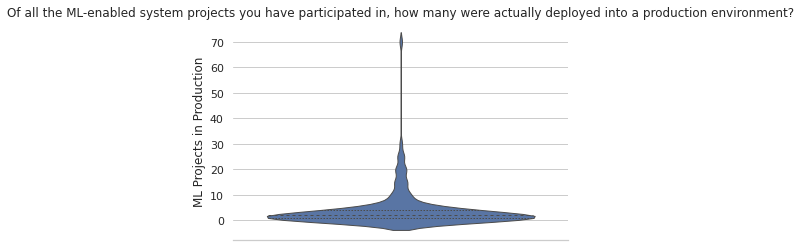

In [11]:
single_violinplot(d8_df, "ML Projects in Production",
                  title="Of all the ML-enabled system projects you have participated in, how many were actually deployed into a production environment?")

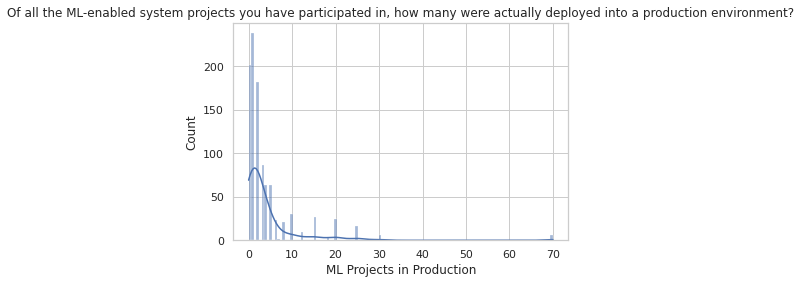

In [12]:
single_histplot(d8_df, "ML Projects in Production",
                title="Of all the ML-enabled system projects you have participated in, how many were actually deployed into a production environment?")